In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

/Users/kapilwanaskar/anaconda3/envs/HW3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:

df = pd.read_csv('training_wids2024C1.csv')

#shape of the data
print("shape of the data is: ", df.shape)

df.head()

shape of the data is:  (12906, 83)


patient_id patient_race  payer_type patient_state  patient_zip3  \
0      475714          NaN    MEDICAID            CA           924   
1      349367        White  COMMERCIAL            CA           928   
2      138632        White  COMMERCIAL            TX           760   
3      617843        White  COMMERCIAL            CA           926   
4      817482          NaN  COMMERCIAL            ID           836   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           84              F    NaN                       C50919   
1           62              F  28.49                       C50411   
2           43              F  38.09                       C50112   
3           45              F    NaN                       C50212   
4           55              F    NaN                         1749   

                        breast_cancer_diagnosis_desc  ...   disabled  \
0  Malignant neoplasm of unsp site of unspecified...  ...  12.871429   
1  Malig neoplm of upper-outer quadrant of right ...  ...   8.957576   
2  Malignant neoplasm of central portion of left ...  ...  11.253333   
3  Malig neoplasm of upper-inner quadrant of left...  ...   8.845238   
4  Malignant neoplasm of breast (female), unspeci...  ...  15.276000   

     poverty limited_english commute_time health_uninsured    veteran  \
0  22.542857       10.100000    27.814286        11.200000   3.500000   
1  10.109091        8.057576    30.606061         7.018182   4.103030   
2   9.663333        3.356667    31.394915        15.066667   7.446667   
3   8.688095        5.280952    27.561905         4.404762   4.809524   
4  11.224000        1.946000    26.170213        12.088000  13.106000   

       Ozone      PM25        N02  DiagPeriodL90D  
0  52.237210  8.650555  18.606528               1  
1  42.301121  8.487175  20.113179               1  
2  40.108207  7.642753  14.839351               1  
3  42.070075  7.229393  15.894123               0  
4  41.356058  4.110749  11.722197               0  

[5 rows x 83 columns]

In [7]:
# Increase display option for maximum rows to ensure all columns are shown
pd.set_option('display.max_rows', 100)

# print list of all 83 columns and null values in each column
print(df.isnull().sum())


patient_id                                   0
patient_race                              6385
payer_type                                1803
patient_state                               51
patient_zip3                                 0
patient_age                                  0
patient_gender                               0
bmi                                       8965
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
Region                                      52
Division                                    52
population                                   1
density                                      1
age_median                                   1
age_under_10                                 1
age_10_to_19                                 1
age_20s                                      1
age_30s      

In [8]:
# print the list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("List of numerical columns :", numerical_columns)

# print the list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("List of categorical columns :", categorical_columns)

List of numerical columns : Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 

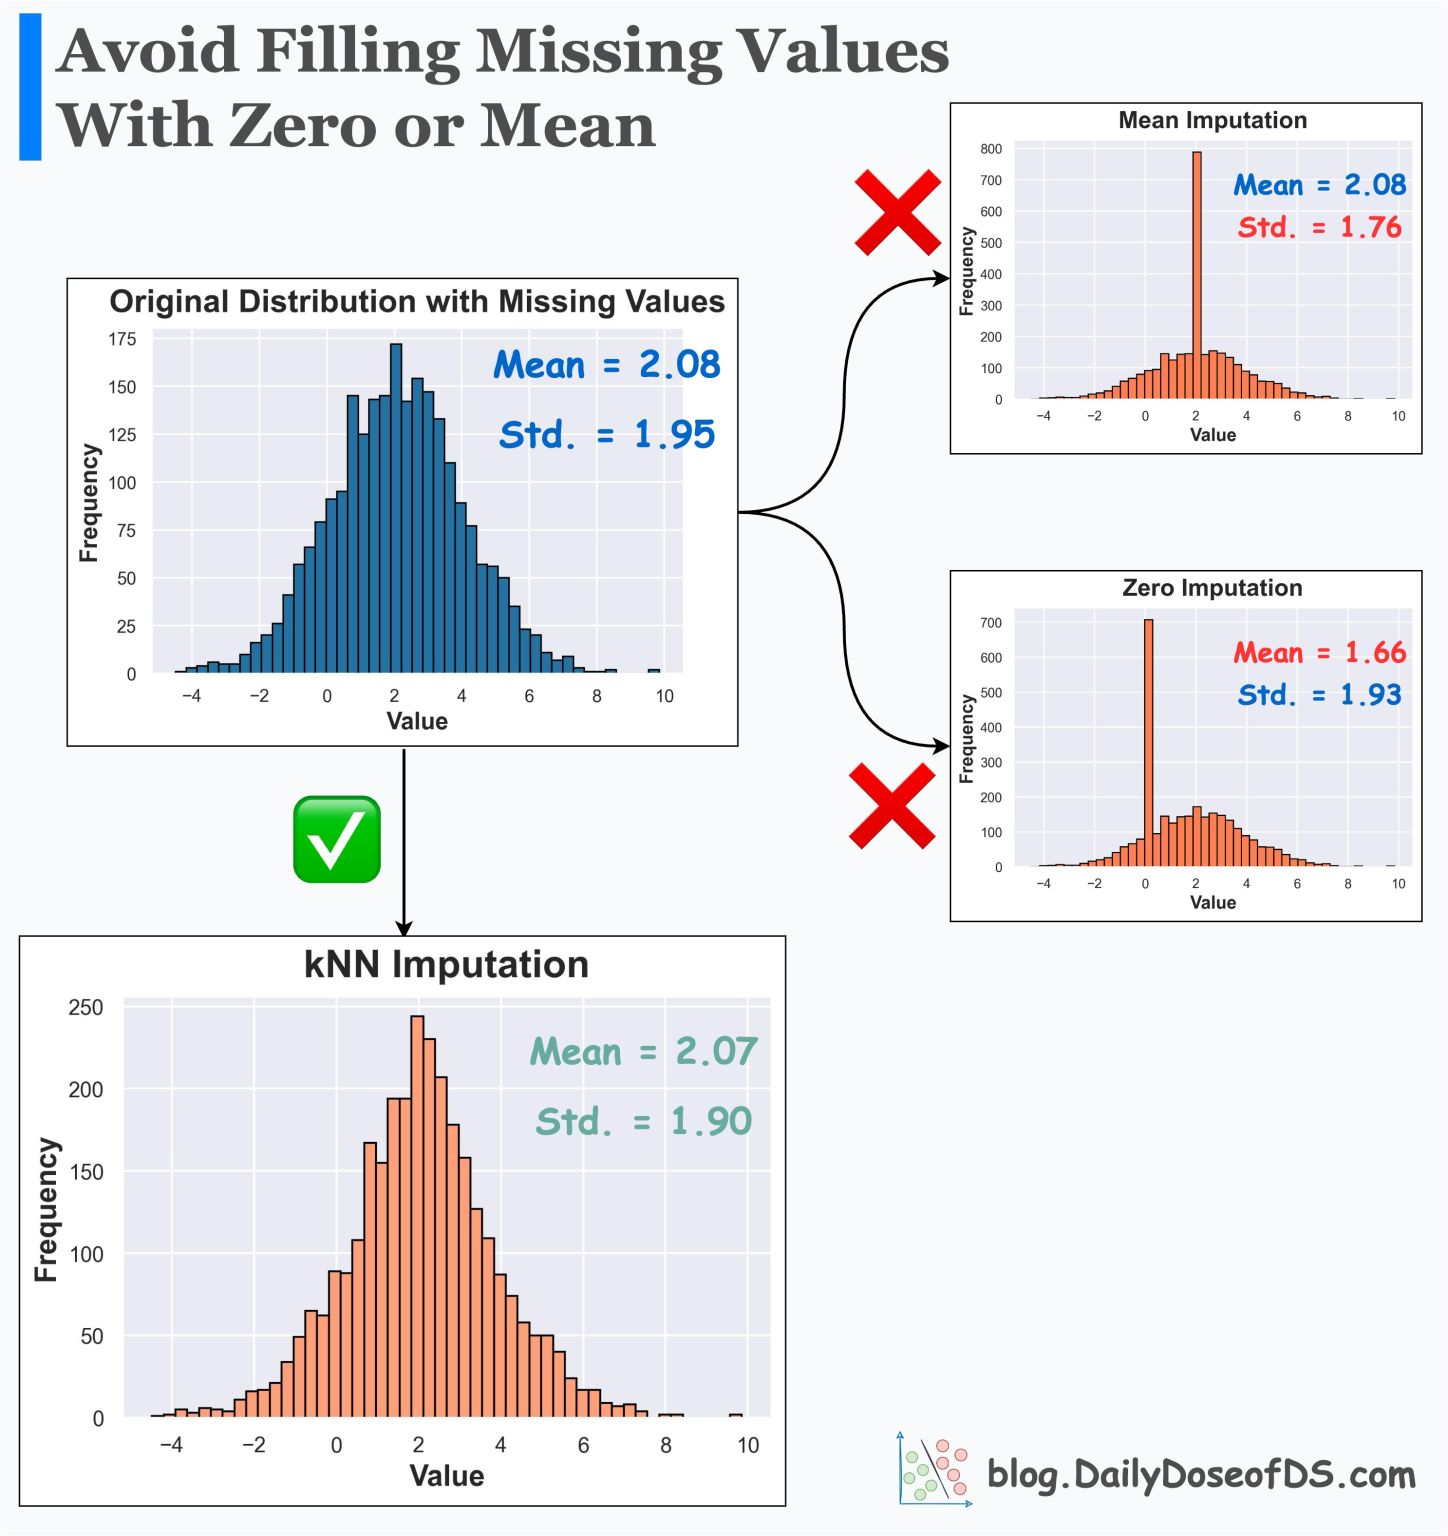

In [9]:
from IPython.display import Image
image_path = "KNN_imputation.png"
#display the image
Image(filename = image_path, width = 800, height = 800)



#### reference: blog.dailydoseofds.com

## KNN Imputation for Numerical Columns

In [10]:
from sklearn.impute import KNNImputer

# Assuming df is your DataFrame

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# Use the provided list of numerical columns for KNN imputation
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Apply KNN imputation
df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])


## Simple Imputation for Categorical Columns

In [11]:
from sklearn.impute import SimpleImputer

# Initialize the Simple Imputer for categorical data
simple_imputer = SimpleImputer(strategy='most_frequent')

# Use the provided list of categorical columns for simple imputation
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Simple imputation
df[categorical_columns] = simple_imputer.fit_transform(df[categorical_columns])


In [12]:
# Increase display option for maximum rows to ensure all columns are shown
pd.set_option('display.max_rows', 100)

# print list of all 83 columns and null values in each column
print(df.isnull().sum())


patient_id                               0
patient_race                             0
payer_type                               0
patient_state                            0
patient_zip3                             0
patient_age                              0
patient_gender                           0
bmi                                      0
breast_cancer_diagnosis_code             0
breast_cancer_diagnosis_desc             0
metastatic_cancer_diagnosis_code         0
metastatic_first_novel_treatment         0
metastatic_first_novel_treatment_type    0
Region                                   0
Division                                 0
population                               0
density                                  0
age_median                               0
age_under_10                             0
age_10_to_19                             0
age_20s                                  0
age_30s                                  0
age_40s                                  0
age_50s    

# EDA

In [13]:
# Print descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Columns:")
print(df[numerical_columns].describe())


Descriptive Statistics for Numerical Columns:
          patient_id  patient_zip3   patient_age           bmi    population  \
count   12906.000000  12906.000000  12906.000000  12906.000000  12906.000000   
mean   547381.196033    573.754300     59.183326     29.033332  20743.600664   
std    260404.959974    275.447534     13.335216      3.819366  13886.694038   
min    100063.000000    101.000000     18.000000     14.000000    635.545455   
25%    321517.000000    331.000000     50.000000     26.684000   9463.896552   
50%    543522.000000    554.000000     59.000000     28.842000  19154.190480   
75%    772671.750000    846.000000     67.000000     31.095500  30021.278690   
max    999896.000000    999.000000     91.000000     85.000000  71374.131580   

            density    age_median  age_under_10  age_10_to_19       age_20s  \
count  12906.000000  12906.000000  12906.000000  12906.000000  12906.000000   
mean    1581.838552     40.502560     11.122744     12.945222     13.290258

# Interpretations

The descriptive statistics for numerical columns in this dataset provide a comprehensive overview of various health-related and environmental factors across a patient population. Key observations from these statistics include:

- **Patient Demographics and Health Metrics:**
  - The `patient_id` column, likely a unique identifier for each patient, spans a wide range, indicating a large and diverse dataset.
  - `patient_zip3` suggests geographical data possibly truncated to the first 3 digits of zip codes, with a broad range indicating a wide geographical spread.
  - `patient_age` shows a broad age distribution from 18 to 91 years, with a mean age of approximately 59 years, suggesting the dataset skews towards an older population.
  - The `bmi` (Body Mass Index) column has a mean of around 29, categorizing the average patient as overweight according to standard BMI classifications. The wide range (14 to 85) indicates both underweight and extremely obese individuals are included.

- **Socioeconomic and Environmental Factors:**
  - The `population` and `density` columns suggest varied living conditions, from sparsely populated to highly dense areas, which could influence health outcomes.
  - Metrics such as `poverty`, `limited_english`, and `health_uninsured` indicate socioeconomic challenges within the patient population, potentially affecting access to healthcare and health literacy.
  - Environmental factors like `Ozone`, `PM25` (Particulate Matter 2.5), and `NO2` levels provide insight into air quality, which is crucial for respiratory health and overall well-being.

- **Healthcare Accessibility and Outcomes:**
  - `commute_time` and `health_uninsured` rates offer a lens into healthcare accessibility, with longer commutes and higher uninsured rates possibly indicating barriers to accessing care.
  - The `DiagPeriodL90D` (Diagnosis Period Last 90 Days) column, with a mean close to 0.625, suggests that approximately 62.5% of the population had a diagnosis or medical interaction in the last 90 days, highlighting active healthcare engagement or possible chronic health conditions in the population.

# Discussions

These statistics underscore the complexity of healthcare analysis, where patient demographics, socioeconomic factors, and environmental conditions intersect to influence health outcomes. Key discussion points include:

- **The Importance of Socioeconomic and Environmental Data:** Understanding how factors like poverty, insurance coverage, and air quality impact health outcomes is crucial for targeted interventions and policy making.

- **Population Ageing:** The skew towards older ages emphasizes the need for healthcare systems to adapt to the challenges of an ageing population, including chronic disease management and geriatric care.

- **Health Inequities:** The variability in socioeconomic indicators (e.g., poverty, limited English proficiency) across the population points to underlying health inequities that may require targeted interventions to ensure equitable healthcare access and outcomes.

- **Environmental Health Risks:** The presence of environmental data highlights the importance of considering air quality as a significant factor in public health studies, especially in the context of respiratory conditions and cardiovascular health.

- **Healthcare Accessibility:** The distribution of commute times and uninsured rates can inform strategies to improve healthcare accessibility, particularly in underserved or rural areas.

This analysis demonstrates the multifaceted nature of health and healthcare, necessitating a holistic approach to healthcare delivery that considers a wide range of demographic, socioeconomic, and environmental factors.


## Histograms for Numerical Columns


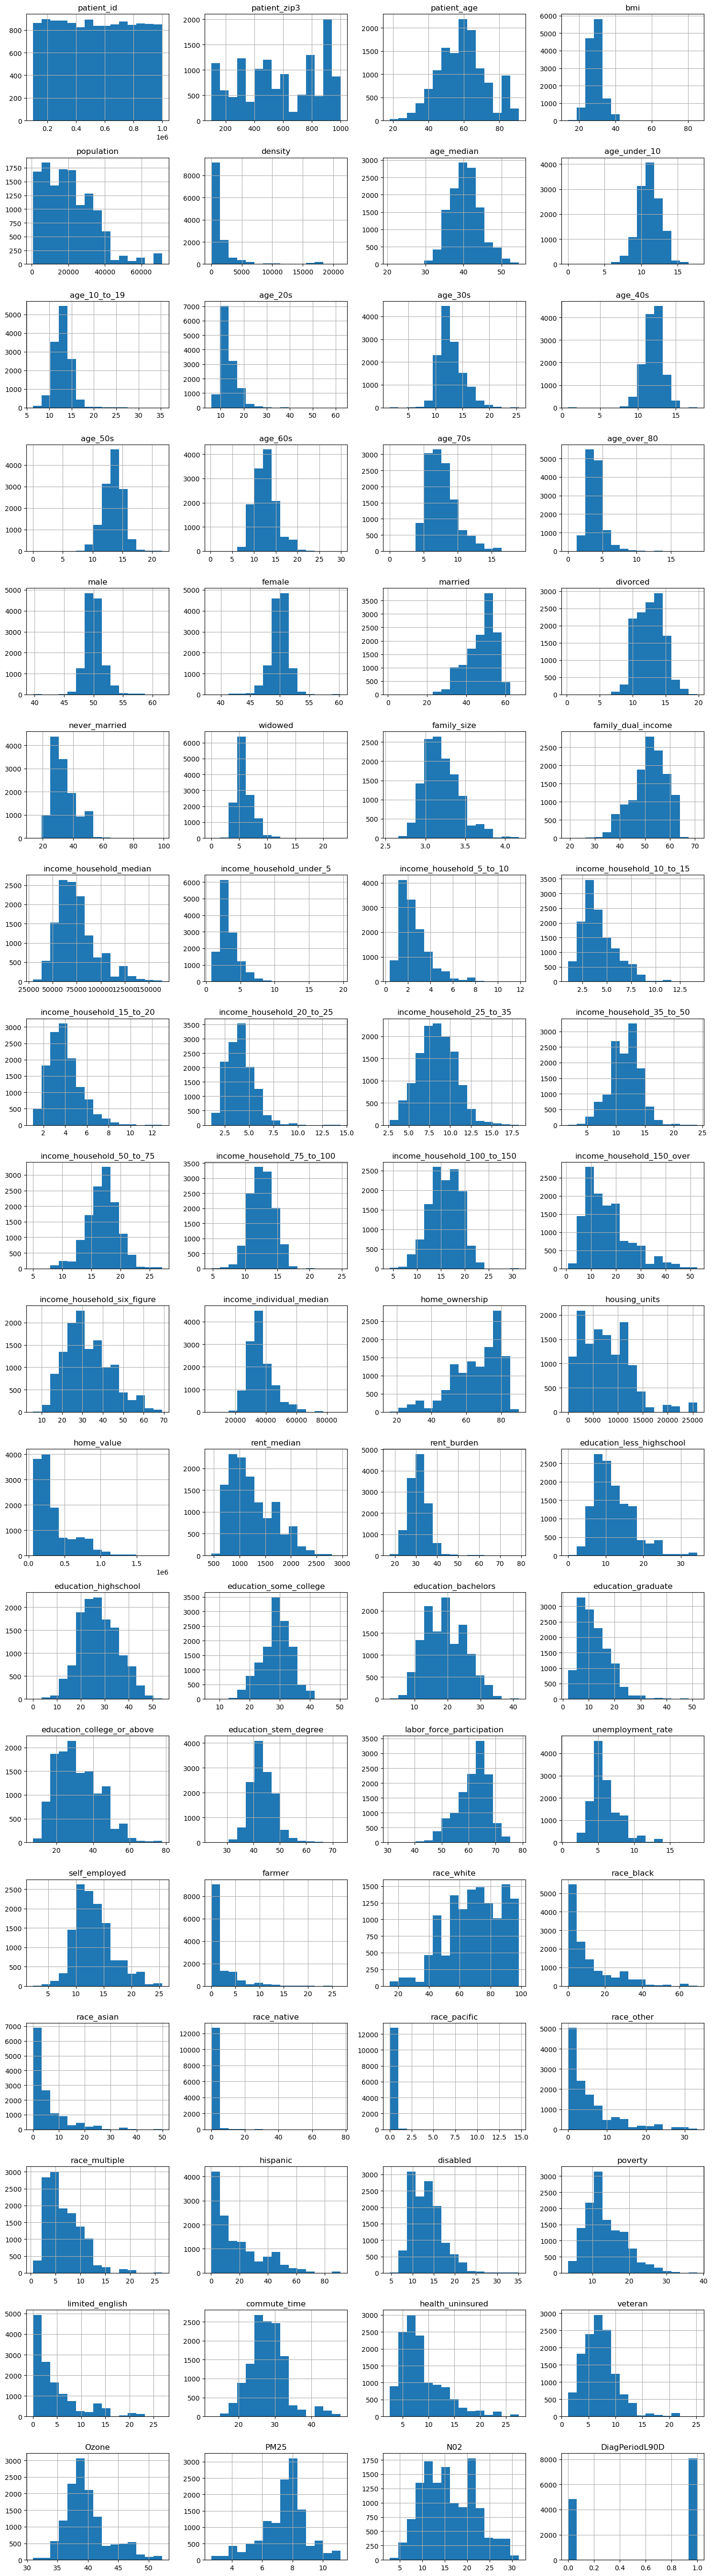

In [14]:
# Calculate the number of rows and columns to fit all numerical columns
n_cols = 4  # Set the number of columns you desire
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Plot histograms
df[numerical_columns].hist(bins=15, figsize=(15, n_rows * 3), layout=(n_rows, n_cols))
plt.tight_layout()
plt.show()


## Box Plots for Numerical Columns

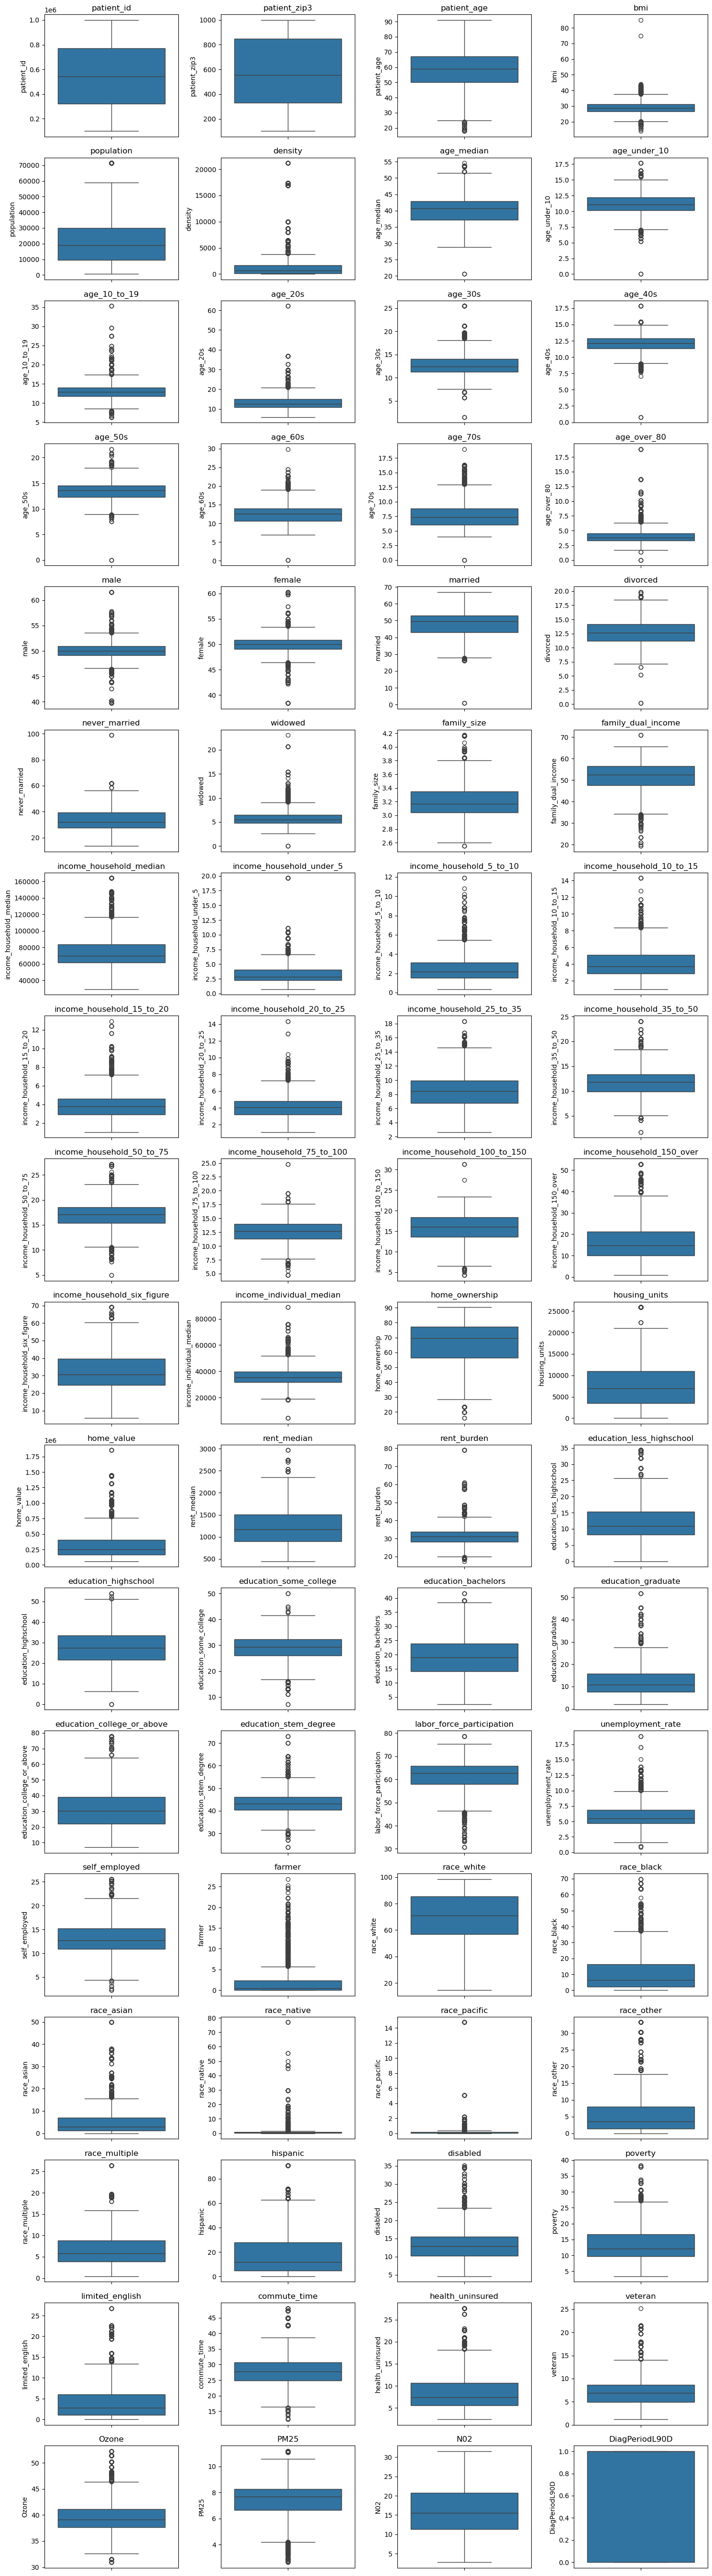

In [15]:
# Ignore specific UserWarnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

plt.figure(figsize=(15, n_rows * 3))  # Adjust figure size based on the number of rows
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

# Reset warnings to default behavior (optional, if you want to see warnings again after this block)
warnings.filterwarnings("default", message="The figure layout has changed to tight")


In [16]:
pd.set_option('display.max_rows', 100)

# Frequency counts for categorical columns
print("Frequency Counts for Categorical Columns:")
for col in categorical_columns:
    print(f"Column: {col}")
    display(df[col].value_counts())
    print("\n")

Frequency Counts for Categorical Columns:
Column: patient_race


patient_race
White       9973
Black       1056
Hispanic     829
Other        683
Asian        365
Name: count, dtype: int64



Column: payer_type


payer_type
COMMERCIAL            7835
MEDICAID              2569
MEDICARE ADVANTAGE    2502
Name: count, dtype: int64



Column: patient_state


patient_state
CA    2489
TX    1155
NY    1041
MI     858
IL     782
OH     754
FL     609
GA     551
PA     483
MN     377
CO     371
VA     365
IN     317
KY     259
AZ     229
WI     212
WA     200
NC     186
MO     160
NM     141
LA     139
TN     112
SC     110
ID      93
OK      93
OR      89
IA      86
MS      76
MD      71
AR      63
NV      62
KS      50
AL      50
MT      45
NE      40
UT      36
DE      33
WV      27
HI      21
NJ      21
DC      20
SD       8
ND       6
AK       6
WY       4
CT       2
PR       1
RI       1
NH       1
MA       1
Name: count, dtype: int64



Column: patient_gender


patient_gender
F    12906
Name: count, dtype: int64



Column: breast_cancer_diagnosis_code


breast_cancer_diagnosis_code
1749      1982
C50911    1797
C50912    1712
C50919    1467
C50411     978
C50412     877
C50811     491
C50812     419
1744       389
1748       307
C50212     293
C50211     276
C50511     213
C50112     209
C50111     208
C50512     176
C50312     159
C50311     138
C50011     108
C50012     105
1742        98
1741        88
1745        71
C50819      54
C50419      48
C5091       37
1743        34
C50612      29
C50611      25
C50319      16
C50019      13
1746        12
C50219      11
C50119      11
C5041        9
19881        9
C5081        8
C50519       8
C5021        3
C509         3
C50929       3
C50619       3
C5011        2
C50021       1
C5031        1
C5051        1
C50          1
1759         1
C5001        1
C50421       1
Name: count, dtype: int64



Column: breast_cancer_diagnosis_desc


breast_cancer_diagnosis_desc
Malignant neoplasm of breast (female), unspecified                  1982
Malignant neoplasm of unsp site of right female breast              1797
Malignant neoplasm of unspecified site of left female breast        1712
Malignant neoplasm of unsp site of unspecified female breast        1467
Malig neoplm of upper-outer quadrant of right female breast          978
Malig neoplasm of upper-outer quadrant of left female breast         877
Malignant neoplasm of ovrlp sites of right female breast             491
Malignant neoplasm of ovrlp sites of left female breast              419
Malignant neoplasm of upper-outer quadrant of female breast          389
Malignant neoplasm of other specified sites of female breast         307
Malig neoplasm of upper-inner quadrant of left female breast         293
Malig neoplm of upper-inner quadrant of right female breast          276
Malig neoplm of lower-outer quadrant of right female breast          213
Malignant neoplasm of 



Column: metastatic_cancer_diagnosis_code


metastatic_cancer_diagnosis_code
C773     7052
C7951    1842
C779      764
C7981     467
C7800     414
C787      362
C7989     344
C799      282
C7931     282
C792      166
C771      156
C7801     149
C770      126
C782       81
C778       77
C7802      73
C786       43
C7952      32
C781       31
C772       27
C785       16
C7960      16
C7949      15
C775       13
C7982      12
C7889      12
C7970       8
C7940       7
C7932       7
C784        6
C7911       5
C774        3
C7961       3
C7900       2
C7880       2
C7901       2
C7972       1
C7910       1
C7839       1
C7962       1
C7971       1
C7830       1
C7919       1
Name: count, dtype: int64



Column: metastatic_first_novel_treatment


metastatic_first_novel_treatment
PEMBROLIZUMAB    12895
OLAPARIB            11
Name: count, dtype: int64



Column: metastatic_first_novel_treatment_type


metastatic_first_novel_treatment_type
Antineoplastics    12906
Name: count, dtype: int64



Column: Region


Region
South        3971
West         3735
Midwest      3650
Northeast    1550
Name: count, dtype: int64



Column: Division


Division
East North Central    2975
Pacific               2754
South Atlantic        1972
Middle Atlantic       1545
West South Central    1450
Mountain               981
West North Central     727
East South Central     497
New England              5
Name: count, dtype: int64

# Interpretations

The frequency counts for categorical columns reveal significant insights into the dataset's characteristics and diversity. Notably:

- **Patient Race:**
  - The majority of patients are identified as **White (9973)**, followed by **Black (1056)**, **Hispanic (829)**, **Other (683)**, and **Asian (365)**. This distribution suggests a predominance of White patients within the dataset, indicating potential racial disparities in healthcare access or disease prevalence that merit further investigation.

- **Payer Type:**
  - The dataset shows a substantial number of patients covered by **COMMERCIAL (7835)** insurance, with **MEDICAID (2569)** and **MEDICARE ADVANTAGE (2502)** also representing significant portions. This information is crucial for understanding the insurance landscape and its impact on patient care and outcomes.

- **Patient State:**
  - A wide geographical distribution is observed, with **California (CA)** having the highest number of patients (2489), followed by states like **Texas (TX)**, **New York (NY)**, and **Michigan (MI)**. This geographical diversity can provide insights into regional healthcare needs and disparities.

- **Patient Gender:**
  - Interestingly, all patients in this dataset are female (**F 12906**), indicating a specific focus on female health conditions, such as breast cancer.

- **Breast Cancer Diagnosis Code & Description:**
  - The dataset includes a variety of breast cancer diagnosis codes and descriptions, with the most common being **'Malignant neoplasm of breast (female), unspecified (1982)'**. The presence of numerous specific codes and descriptions underscores the complexity of diagnosing and categorizing breast cancer cases.

- **Metastatic Cancer Diagnosis Code:**
  - A wide range of metastatic cancer diagnosis codes are present, with **C773 (7052)** being the most frequent. This indicates a significant focus on metastatic conditions within the dataset.

- **Metastatic First Novel Treatment:**
  - Almost all patients received **PEMBROLIZUMAB (12895)** as their first novel treatment, highlighting the prevalence of this treatment in the dataset's context.

- **Metastatic First Novel Treatment Type:**
  - The treatment type for all patients is categorized under **Antineoplastics (12906)**, emphasizing the dataset's focus on chemotherapy agents.

- **Region & Division:**
  - The dataset covers patients from various regions, with the **South (3971)** and **West (3735)** having the highest representation. The division with the most patients is **East North Central (2975)**, followed by **Pacific (2754)**. This regional data can inform healthcare resource allocation and policy-making.

# Discussions

The frequency counts for categorical columns provide a foundational understanding of the dataset's demographics, healthcare coverage, and medical conditions, offering several avenues for in-depth analysis and discussion:

- **Healthcare Equity and Access:**
  - The racial and geographical distribution within the dataset raises important questions about healthcare equity and the accessibility of novel treatments across different populations.

- **Insurance Dynamics:**
  - The variation in payer types could influence treatment options and outcomes, suggesting an area for further research into how insurance coverage impacts patient care in oncology.

- **Focus on Female Health:**
  - The exclusive focus on female patients indicates the dataset's specific interest in conditions such as breast cancer, highlighting the importance of gender-specific research in healthcare.

- **Breast Cancer Complexity:**
  - The detailed breakdown of breast cancer diagnosis codes and descriptions illustrates the disease's complexity and the necessity for precise categorization to tailor treatment approaches effectively.

- **Treatment Trends:**
  - The predominance of PEMBROLIZUMAB as a first novel treatment and the uniform classification of treatments as antineoplastics provide insights into current trends in metastatic cancer treatment, potentially reflecting recent advancements in therapy.

- **Regional Healthcare Needs:**
  - The regional and divisional patient distribution can guide targeted healthcare strategies and interventions, particularly in areas with higher patient counts, to address specific healthcare needs and disparities.

This dataset's categorical data underscores the intricate interplay between patient demographics, healthcare coverage, treatment options, and geographical factors in understanding and addressing healthcare challenges.


# Bar Charts for Categorical Columns

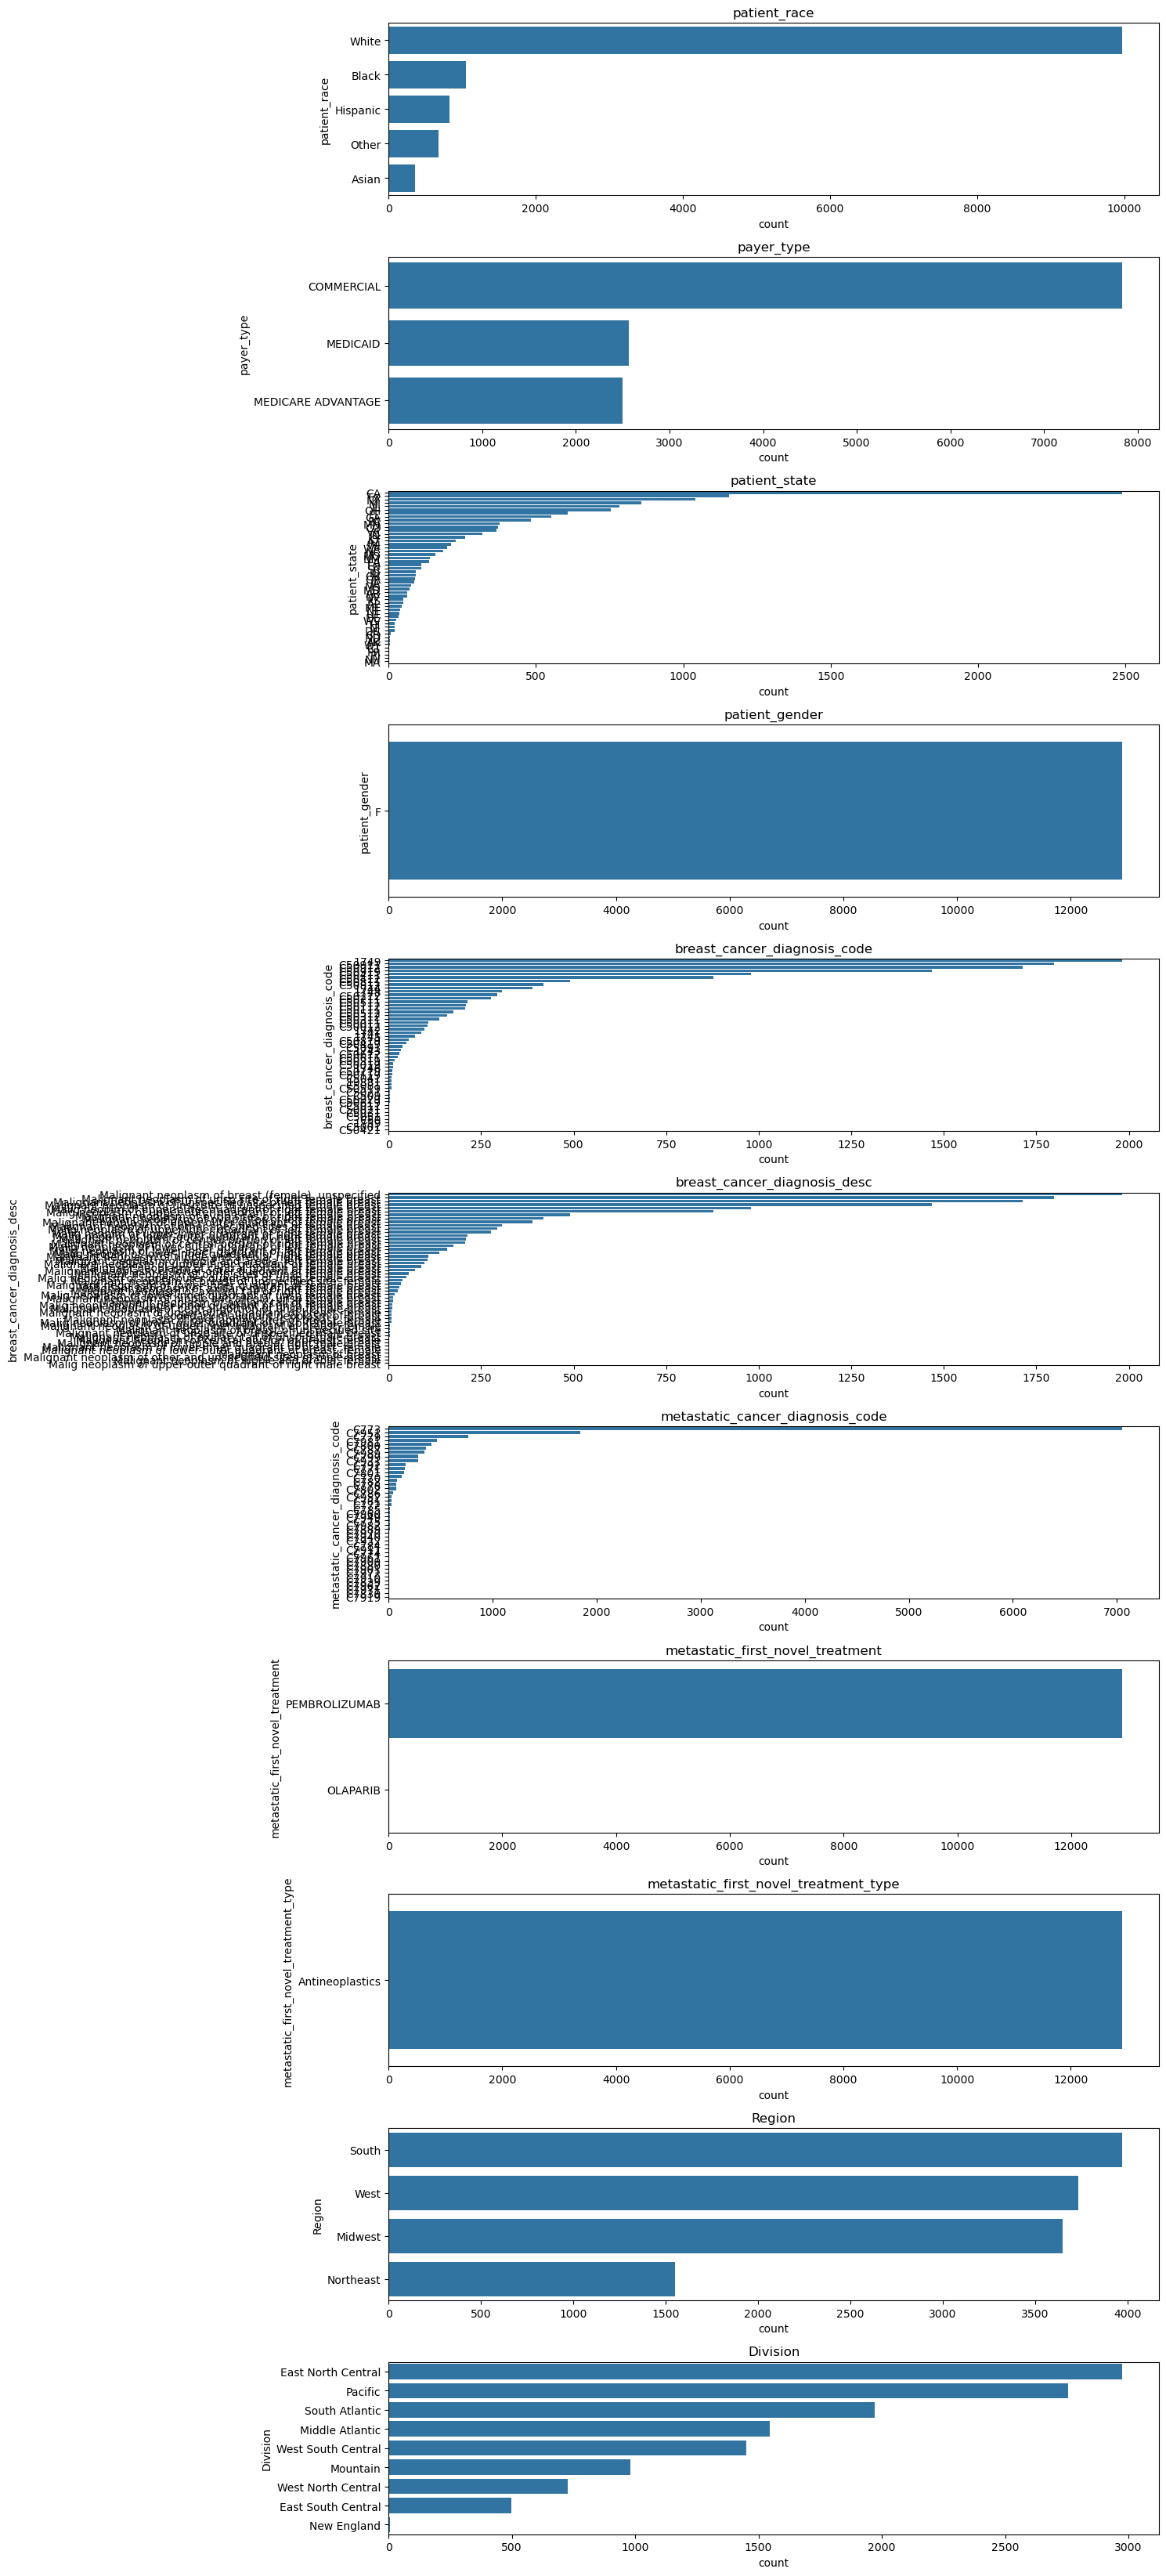

In [17]:
# Adjust grid size dynamically based on number of categorical columns
n_cols = 1  # Desired number of columns in the plot
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(15, n_rows * 3))

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)

for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

# Show plot
plt.show()

# Reset warnings to default behavior
warnings.filterwarnings("default", category=UserWarning)


## Correlation Matrix Visualization

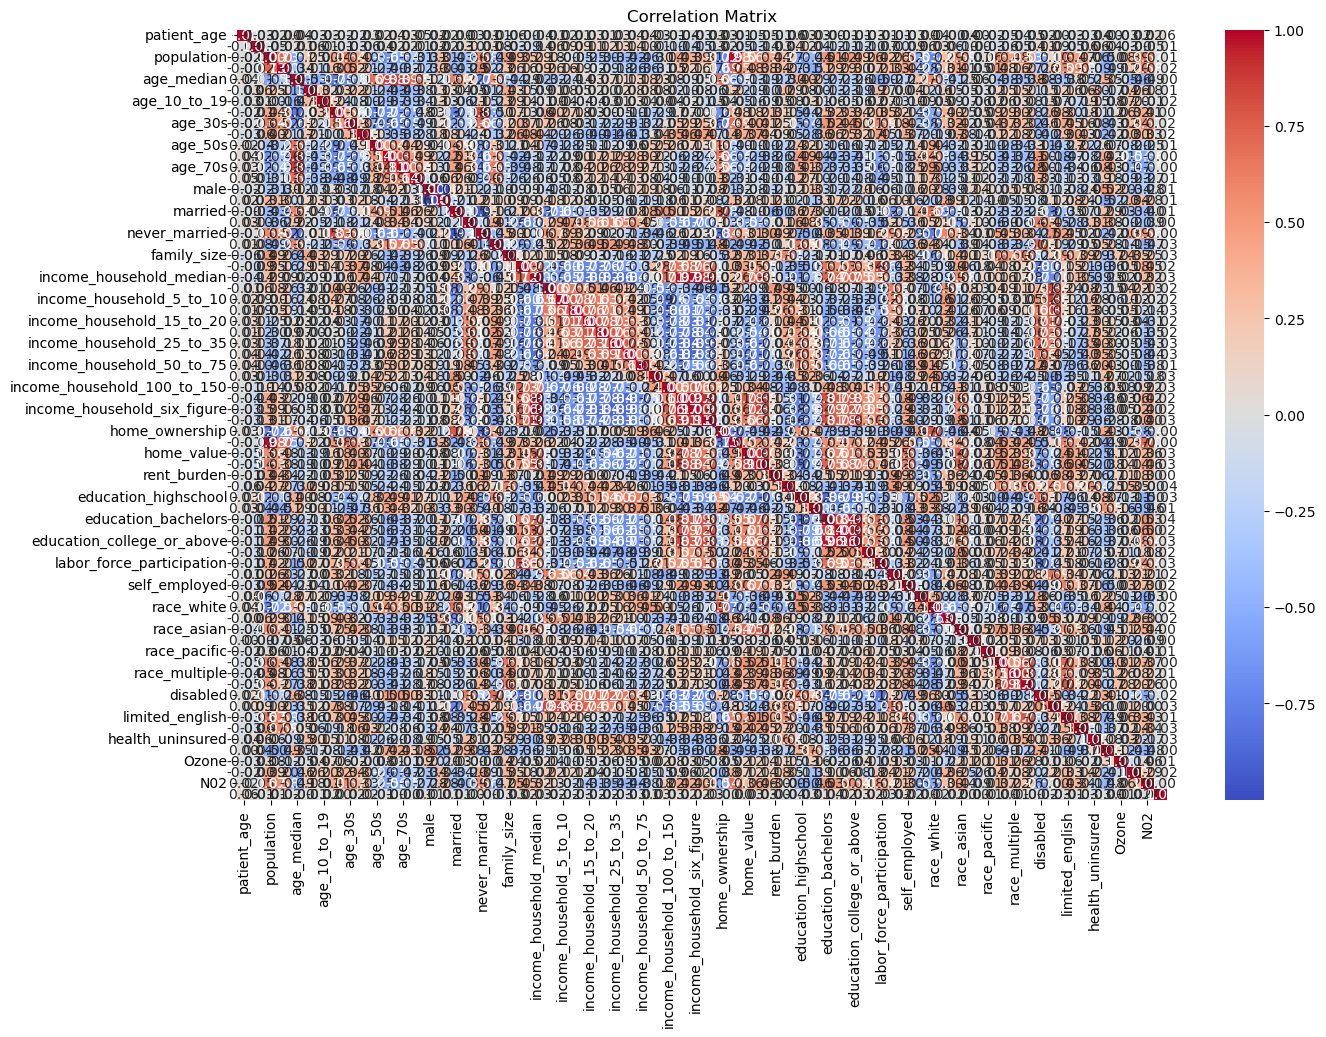

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude ID-like columns from correlation analysis if needed
excluded_columns = ['patient_id', 'patient_zip3']
corr_columns = [col for col in numerical_columns if col not in excluded_columns]

plt.figure(figsize=(15, 10))

# Calculate correlation matrix for the relevant numerical columns
corr_matrix = df[corr_columns].corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [19]:
target = df['DiagPeriodL90D']
# number of unique values in the target column
print(target.unique())

print(target.value_counts())

[1. 0.]
DiagPeriodL90D
1.0    8060
0.0    4846
Name: count, dtype: int64


# ML model training and Evaluation

## Step 1: Data Preparation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the features and target
X = df.drop('DiagPeriodL90D', axis=1)
y = df['DiagPeriodL90D']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


## Step 2: Implement Classification Models

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('nd', GradientBoostingClassifier())
]

# Iterate over the defined classifiers
for name, classifier in classifiers:
    # Create the pipeline with the current classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Train the model using the training data
    pipeline.fit(X_train, y_train)
    
    # Generate predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Print the classification report for the current model
    print(f"{name} Performance:\n")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------------\n")


Logistic Regression Performance:

              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70       965
         1.0       0.79      0.96      0.87      1617

    accuracy                           0.82      2582
   macro avg       0.84      0.77      0.78      2582
weighted avg       0.83      0.82      0.80      2582

--------------------------------------------------

Random Forest Performance:

              precision    recall  f1-score   support

         0.0       0.80      0.58      0.67       965
         1.0       0.78      0.91      0.84      1617

    accuracy                           0.79      2582
   macro avg       0.79      0.74      0.76      2582
weighted avg       0.79      0.79      0.78      2582

--------------------------------------------------

SVM Performance:

              precision    recall  f1-score   support

         0.0       0.90      0.54      0.67       965
         1.0       0.78      0.96      0.86      1617

In [22]:
import pandas as pd

# Initialize an empty list to store results
results = []

# Iterate over classifiers
for name, classifier in classifiers:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Generate classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract relevant metrics
    precision_0 = report['0.0']['precision']
    recall_0 = report['0.0']['recall']
    f1_score_0 = report['0.0']['f1-score']
    
    precision_1 = report['1.0']['precision']
    recall_1 = report['1.0']['recall']
    f1_score_1 = report['1.0']['f1-score']
    
    accuracy = report['accuracy']
    macro_avg_precision = report['macro avg']['precision']
    macro_avg_recall = report['macro avg']['recall']
    macro_avg_f1 = report['macro avg']['f1-score']
    
    weighted_avg_precision = report['weighted avg']['precision']
    weighted_avg_recall = report['weighted avg']['recall']
    weighted_avg_f1 = report['weighted avg']['f1-score']
    
    # Append results to the list
    results.append([name, precision_0, recall_0, f1_score_0, precision_1, recall_1, f1_score_1,
                    accuracy, macro_avg_precision, macro_avg_recall, macro_avg_f1,
                    weighted_avg_precision, weighted_avg_recall, weighted_avg_f1])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Precision (Class 0)', 'Recall (Class 0)', 'F1-Score (Class 0)',
                                            'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)',
                                            'Accuracy', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1',
                                            'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1'])

# Display the results DataFrame
display(results_df)


Model  Precision (Class 0)  Recall (Class 0)  \
0  Logistic Regression             0.887302          0.579275   
1        Random Forest             0.801724          0.578238   
2                  SVM             0.897569          0.535751   
3                  KNN             0.519104          0.408290   
4        Decision Tree             0.597793          0.617617   
5    Gradient Boosting             0.898858          0.570984   

   F1-Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.700940             0.792008          0.956092   
1            0.671884             0.784199          0.914657   
2            0.670993             0.776670          0.963513   
3            0.457077             0.686780          0.774273   
4            0.607543             0.767192          0.752010   
5            0.698352             0.789741          0.961657   

   F1-Score (Class 1)  Accuracy  Macro Avg Precision  Macro Avg Recall  \
0            0.866349  0.815259             0.839655          0.767683   
1            0.844419  0.788923             0.792962          0.746448   
2            0.860061  0.803641             0.837120          0.749632   
3            0.727907  0.637490             0.602942          0.591282   
4            0.759525  0.701782             0.682493          0.684813   
5            0.867262  0.815647             0.844300          0.766321   

   Macro Avg F1  Weighted Avg Precision  Weighted Avg Recall  Weighted Avg F1  
0      0.783645                0.827623             0.815259         0.804529  
1      0.758152                0.790749             0.788923         0.779936  
2      0.765527                0.821855             0.803641         0.789398  
3      0.592492                0.624113             0.637490         0.626686  
4      0.683534                0.703881             0.701782         0.702723  
5      0.782807                0.830523             0.815647         0.804133

In [24]:
# display transpose of the results_df dataframe
display(results_df.T)

0              1         2  \
Model                   Logistic Regression  Random Forest       SVM   
Precision (Class 0)                0.887302       0.801724  0.897569   
Recall (Class 0)                   0.579275       0.578238  0.535751   
F1-Score (Class 0)                  0.70094       0.671884  0.670993   
Precision (Class 1)                0.792008       0.784199   0.77667   
Recall (Class 1)                   0.956092       0.914657  0.963513   
F1-Score (Class 1)                 0.866349       0.844419  0.860061   
Accuracy                           0.815259       0.788923  0.803641   
Macro Avg Precision                0.839655       0.792962   0.83712   
Macro Avg Recall                   0.767683       0.746448  0.749632   
Macro Avg F1                       0.783645       0.758152  0.765527   
Weighted Avg Precision             0.827623       0.790749  0.821855   
Weighted Avg Recall                0.815259       0.788923  0.803641   
Weighted Avg F1                    0.804529       0.779936  0.789398   

                               3              4                  5  
Model                        KNN  Decision Tree  Gradient Boosting  
Precision (Class 0)     0.519104       0.597793           0.898858  
Recall (Class 0)         0.40829       0.617617           0.570984  
F1-Score (Class 0)      0.457077       0.607543           0.698352  
Precision (Class 1)      0.68678       0.767192           0.789741  
Recall (Class 1)        0.774273        0.75201           0.961657  
F1-Score (Class 1)      0.727907       0.759525           0.867262  
Accuracy                 0.63749       0.701782           0.815647  
Macro Avg Precision     0.602942       0.682493             0.8443  
Macro Avg Recall        0.591282       0.684813           0.766321  
Macro Avg F1            0.592492       0.683534           0.782807  
Weighted Avg Precision  0.624113       0.703881           0.830523  
Weighted Avg Recall      0.63749       0.701782           0.815647  
Weighted Avg F1         0.626686       0.702723           0.804133

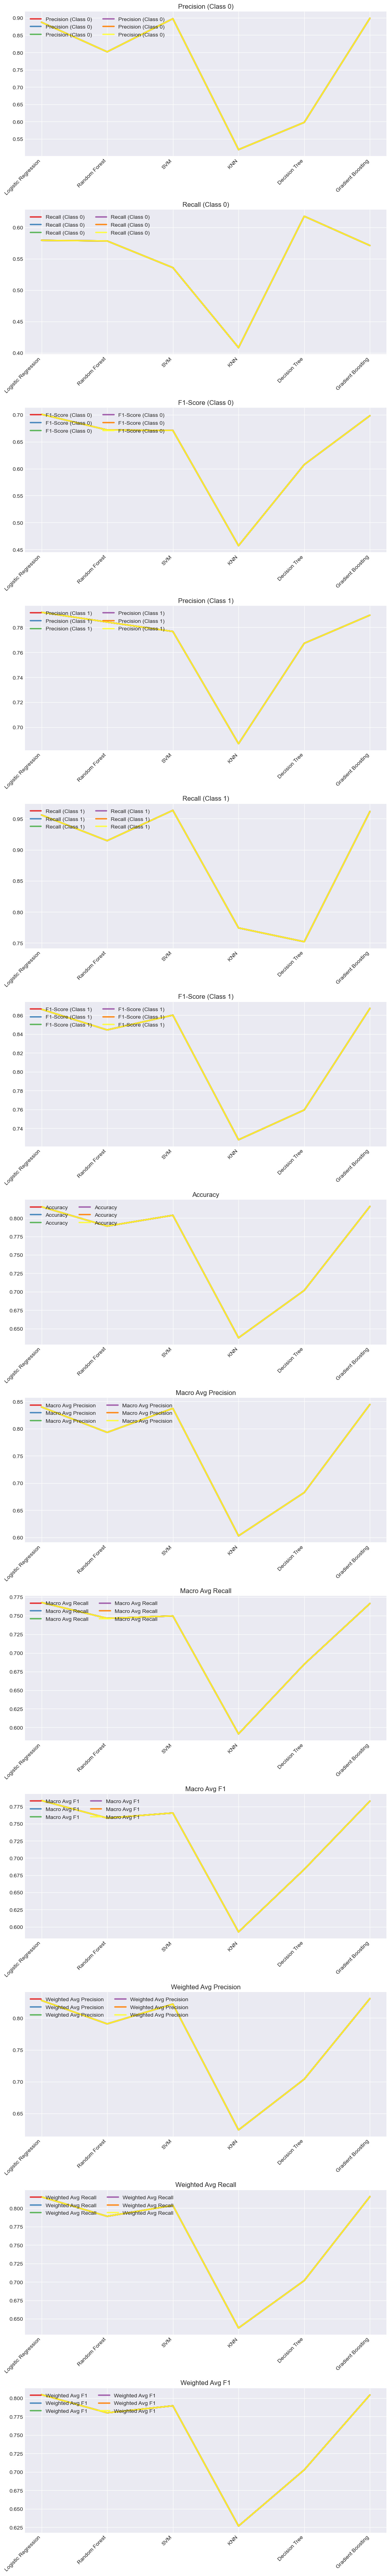

In [25]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create a color palette
palette = plt.get_cmap('Set1')

# Plot each column
num_metrics = results_df.shape[1] - 1  # Exclude the 'Model' column
fig, axes = plt.subplots(num_metrics, 1, figsize=(10, 5 * num_metrics))

metrics = results_df.columns[1:]  # Exclude 'Model' column

for i, metric in enumerate(metrics):
    for j in range(results_df.shape[0]):
        axes[i].plot(results_df['Model'], results_df[metric], marker='', color=palette(j), linewidth=2.5, alpha=0.9, label=metric)
    axes[i].set_title(metric)
    axes[i].set_xticks(results_df['Model'])
    axes[i].set_xticklabels(results_df['Model'], rotation=45, ha="right")
    axes[i].legend(loc='upper left', ncol=2)

# Show plot
plt.tight_layout()
plt.show()


# Interpretations

When comparing the performance of these six machine learning classification models across various metrics, we observe the following:

- **Precision (Class 0 and Class 1):**
  - **Gradient Boosting** and **SVM (Support Vector Machine)** show the highest precision for Class 0, indicating their effectiveness in correctly identifying negative class instances. **Gradient Boosting** slightly leads, suggesting it's particularly adept at minimizing false positives for Class 0.
  - For Class 1, **Logistic Regression** shows the highest precision, closely followed by **Gradient Boosting** and **Random Forest**. This implies that Logistic Regression is more reliable for predicting positive class instances without misclassifying negative ones as positive.

- **Recall (Class 0 and Class 1):**
  - Recall measures the ability to capture all actual positive instances. For Class 0, all models perform moderately, with **Logistic Regression** and **Decision Tree** having slightly higher recall, indicating their relative strength in identifying all actual negatives.
  - **Class 1** sees significantly higher recall values, especially for **SVM** and **Gradient Boosting**, showing their effectiveness in identifying all positive instances. This is crucial in applications where missing a positive instance (false negative) is costly.

- **F1-Score (Class 0 and Class 1):**
  - The F1-Score is a balance between precision and recall. **Gradient Boosting** shows a strong F1-Score for both classes, indicating a balanced performance in precision and recall. **Logistic Regression** also performs well for Class 1, which suggests it as a robust choice for balanced performance in predicting positive instances.

- **Accuracy:**
  - **Gradient Boosting** and **Logistic Regression** show the highest overall accuracy, making them generally reliable for balanced datasets. However, accuracy alone doesn't provide insights into class-specific performance.

- **Macro and Weighted Averages:**
  - The macro average precision, recall, and F1 show **Gradient Boosting** as a consistent top performer, suggesting its effectiveness across both classes equally. The weighted averages, which take class imbalance into account, also indicate **Gradient Boosting** and **Logistic Regression** as strong performers, with Gradient Boosting slightly leading in precision.

# Discussions

- **Gradient Boosting** emerges as a consistently strong model across most metrics, demonstrating its robustness and versatility in handling different classes. Its strength lies in effectively minimizing false positives and false negatives, making it suitable for applications requiring balanced performance across classes.
  
- **Logistic Regression** shows notable strength in precision for Class 1 and overall accuracy, making it a reliable choice for applications where the cost of false positives is high. Its simplicity and interpretability also make it appealing for initial model development and baseline comparisons.

- **SVM** and **Decision Tree** show specialized strengths (SVM in recall for Class 1 and Decision Tree in recall for Class 0), but their overall balanced performance is outshone by Gradient Boosting and Logistic Regression. However, they may still be preferred in specific contexts where their particular strengths align with the application's needs.

- **Random Forest** and **KNN (K-Nearest Neighbors)** do not lead in any specific metric but offer competitive performance in certain areas. Random Forest, for example, is relatively strong in precision for Class 1, while KNN does not particularly excel in the metrics evaluated, indicating it may not be the best choice for this dataset.

- The choice of model should be guided not just by these metrics but also by the specific application needs, including considerations such as model interpretability, computational efficiency, and ease of integration into existing systems. For instance, while Gradient Boosting shows excellent performance, it may also be computationally intensive and less interpretable than simpler models like Logistic Regression or Decision Trees.

- It's also important to consider the potential impact of class imbalance on these metrics. Models with high precision and recall for one class but not the other might be less effective in real-world applications where both classes are equally important. In such cases, techniques to address class imbalance should be considered to improve model performance.


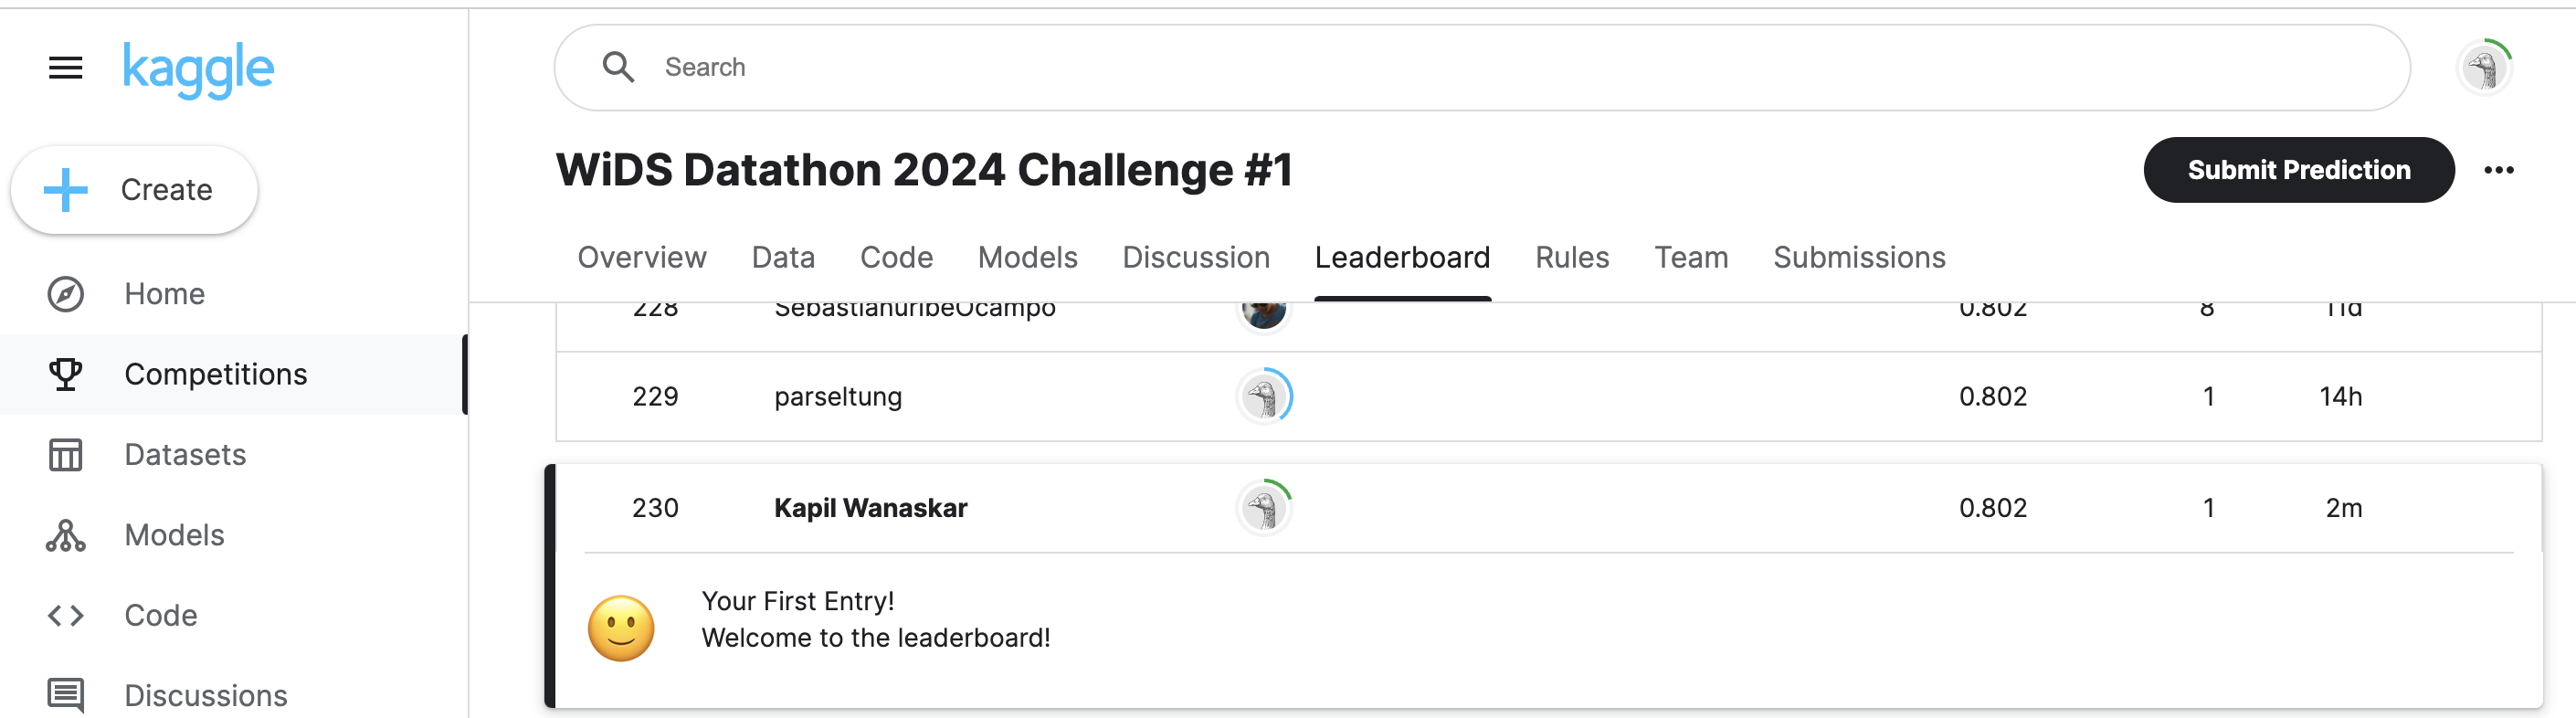

In [28]:
from IPython.display import Image
image_path = "Kaggle_leaderboard.png"
#display the image
Image(filename = image_path, width = 1200, height = 800)

